In [1]:
#Import libraries for data manipulation and analysis.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
#Read the data into the jupiter notebook.
df=pd.read_excel(r"C:\Users\User\Downloads\Road Accident Data.xlsx")

In [74]:
##For manual data inspection.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307973 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Day_of_Week                 307973 non-null  object        
 3   Junction_Control            307973 non-null  object        
 4   Junction_Detail             307973 non-null  object        
 5   Accident_Severity           307973 non-null  object        
 6   Latitude                    307973 non-null  float64       
 7   Light_Conditions            307973 non-null  object        
 8   Local_Authority_(District)  307973 non-null  object        
 9   Carriageway_Hazards         5424 non-null    object        
 10  Longitude                   307973 non-null  float64       
 11  Number_of_Casualties        307973 non-

In [72]:
#Converting time data to the right format.
df["Time"] = pd.to_datetime(df["Time"])

In [76]:
##Dropping duplicates.
df = df.drop_duplicates()

In [92]:
##Check the percentage of missing data in the columns.
df.isnull().sum()/len(df)*100
#We drop the Carriageway_Hazards column since it has more than 50 percent of it data missing.
df = df.drop(columns="Carriageway_Hazards")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307973 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Day_of_Week                 307973 non-null  object        
 3   Junction_Control            307973 non-null  object        
 4   Junction_Detail             307973 non-null  object        
 5   Accident_Severity           307973 non-null  object        
 6   Latitude                    307973 non-null  float64       
 7   Light_Conditions            307973 non-null  object        
 8   Local_Authority_(District)  307973 non-null  object        
 9   Longitude                   307973 non-null  float64       
 10  Number_of_Casualties        307973 non-null  int64         
 11  Number_of_Vehicles          307973 non-

In [82]:
df.head(2)

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Hour
0,BS0000001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,2,Metropolitan Police,Dry,One way street,30,1900-01-01 15:11:00,Urban,Fine no high winds,Car,15.0
1,BS0000002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,2,Metropolitan Police,Wet or damp,Single carriageway,30,1900-01-01 10:59:00,Urban,Fine no high winds,Taxi/Private hire car,10.0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307973 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Day_of_Week                 307973 non-null  object        
 3   Junction_Control            307973 non-null  object        
 4   Junction_Detail             307973 non-null  object        
 5   Accident_Severity           307973 non-null  object        
 6   Latitude                    307973 non-null  float64       
 7   Light_Conditions            307973 non-null  object        
 8   Local_Authority_(District)  307973 non-null  object        
 9   Longitude                   307973 non-null  float64       
 10  Number_of_Casualties        307973 non-null  int64         
 11  Number_of_Vehicles          307973 non-

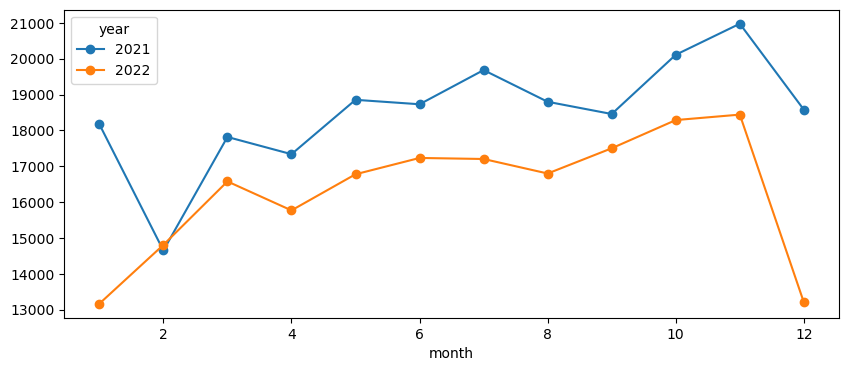

In [124]:
df["month"]=df["Accident Date"].dt.month
df["year"]=df["Accident Date"].dt.year
monthly_accidents = df.groupby(["year","month"])["Number_of_Casualties"].sum().reset_index()
# Pivot for easier plotting
pivot_df = monthly_accidents.pivot(index="month", columns="year", values="Number_of_Casualties")
# Plot the trend
pivot_df.plot(kind="line", marker="o", figsize=(10, 4))
plt.title("Monthly Trend of Accidents Over Two Years")
plt.xlabel("Month")
plt.ylabel("Total Accidents")
plt.show;

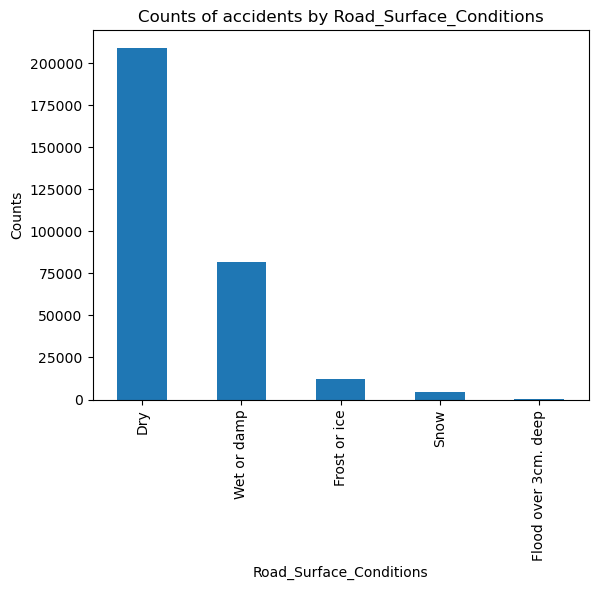

In [94]:
df["Road_Surface_Conditions"].value_counts().plot(kind="bar")
plt.title("Counts of accidents by Road_Surface_Conditions")
plt.xlabel("Road_Surface_Conditions")
plt.ylabel("Counts")
plt.show();

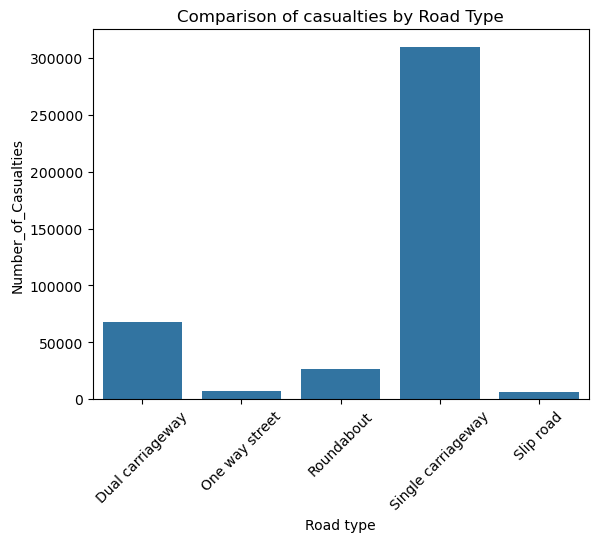

In [62]:
data = (df.groupby("Road_Type")["Number_of_Casualties"].sum()).to_frame()
sns.barplot(x="Road_Type",y="Number_of_Casualties",data=data)
plt.xlabel("Road type")
plt.ylabel("Number_of_Casualties")
plt.title("Comparison of casualties by Road Type")
plt.xticks(rotation=45)
plt.show();

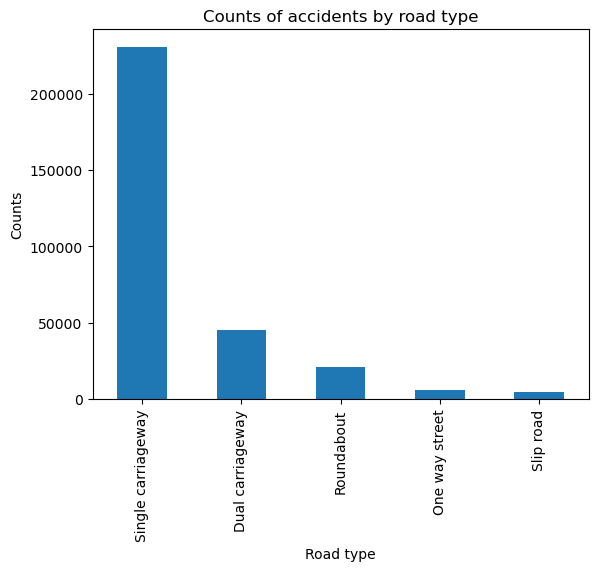

In [36]:
df["Road_Type"].value_counts().plot(kind="bar")
plt.title("Counts of accidents by road type")
plt.xlabel("Road type")
plt.ylabel("Counts")
plt.show();

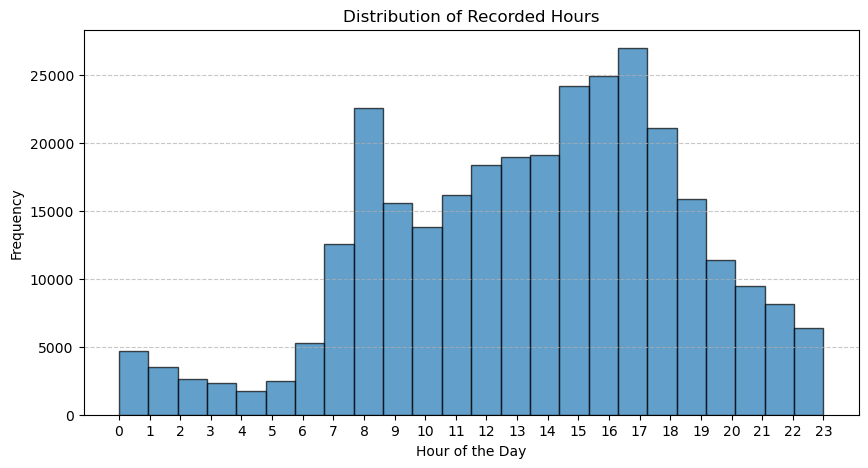

In [32]:

# Convert "Time" column to datetime format
df['Time'] = pd.to_datetime(df['Time'],format='%H:%M:%S')
# Extract the hour component
df['Hour'] = df['Time'].dt.hour
plt.figure(figsize=(10, 5))
plt.hist(df['Hour'], bins=24,edgecolor="black", alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Recorded Hours')
plt.xticks(range(0, 24))  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show();

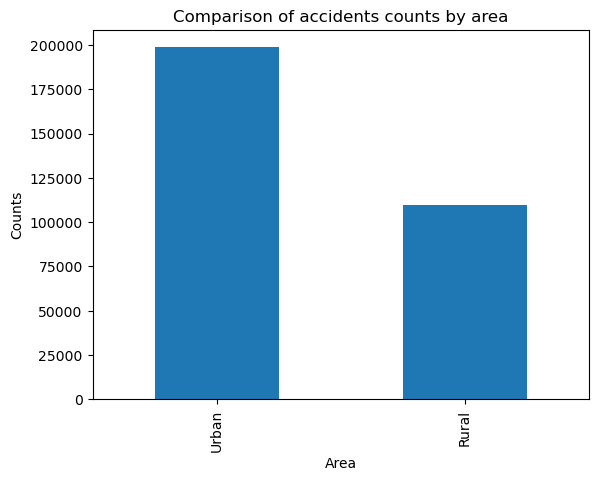

In [16]:
df["Urban_or_Rural_Area"].value_counts().plot(kind="bar")
plt.title("Comparison of accidents counts by area")
plt.xlabel("Area")
plt.ylabel("Counts")
plt.show();

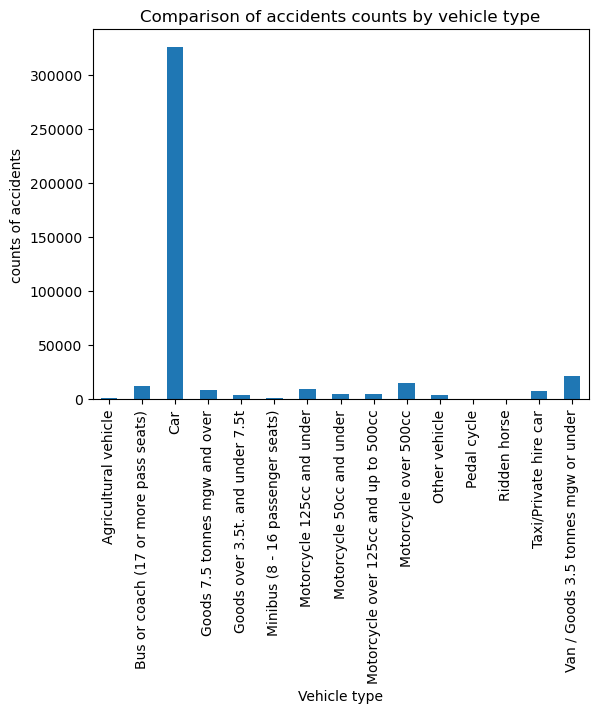

In [12]:
data= df.groupby("Vehicle_Type")["Number_of_Casualties"].sum()
data.plot(x="Vehicle_Type",y="Number_of_Casualties",kind="bar")
plt.title("Comparison of accidents counts by vehicle type")
plt.xlabel("Vehicle type")
plt.ylabel("counts of accidents")
plt.show();

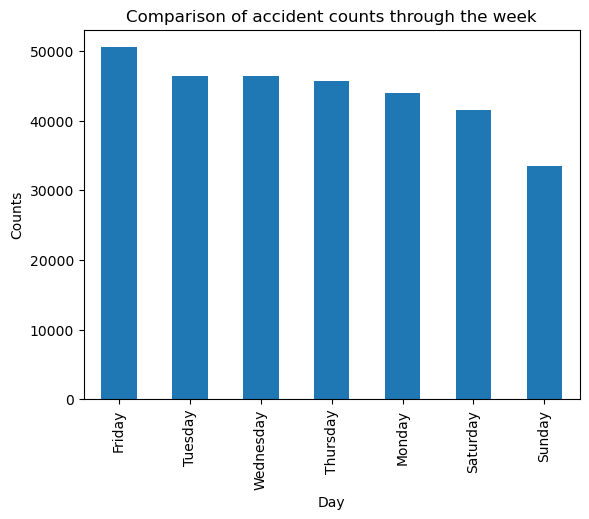

In [10]:
df["Day_of_Week"].value_counts().plot(kind="bar")
plt.title("Comparison of accident counts through the week")
plt.xlabel("Day")
plt.ylabel("Counts")
plt.show();

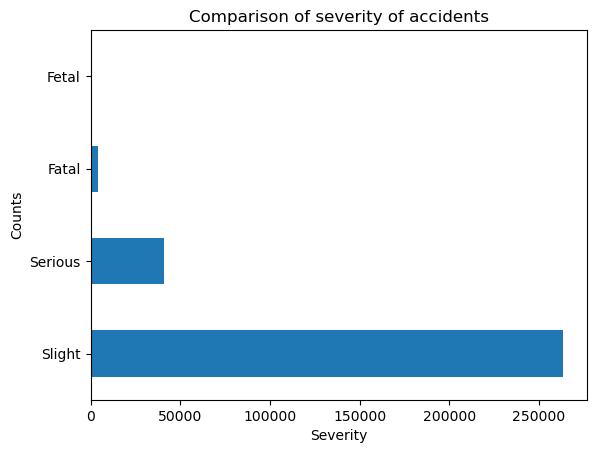

In [8]:
df["Accident_Severity"].value_counts().plot(kind="barh")
plt.title("Comparison of severity of accidents")
plt.xlabel("Severity")
plt.ylabel("Counts")
plt.show();